## Visualising the Lines in Plots

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [4]:
def loadPrices(fn):
    global nt, nInst
    df = pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt, nInst) = df.shape
    return (df.values).T


pricesFile = "./prices.txt"
prcAll = loadPrices(pricesFile)

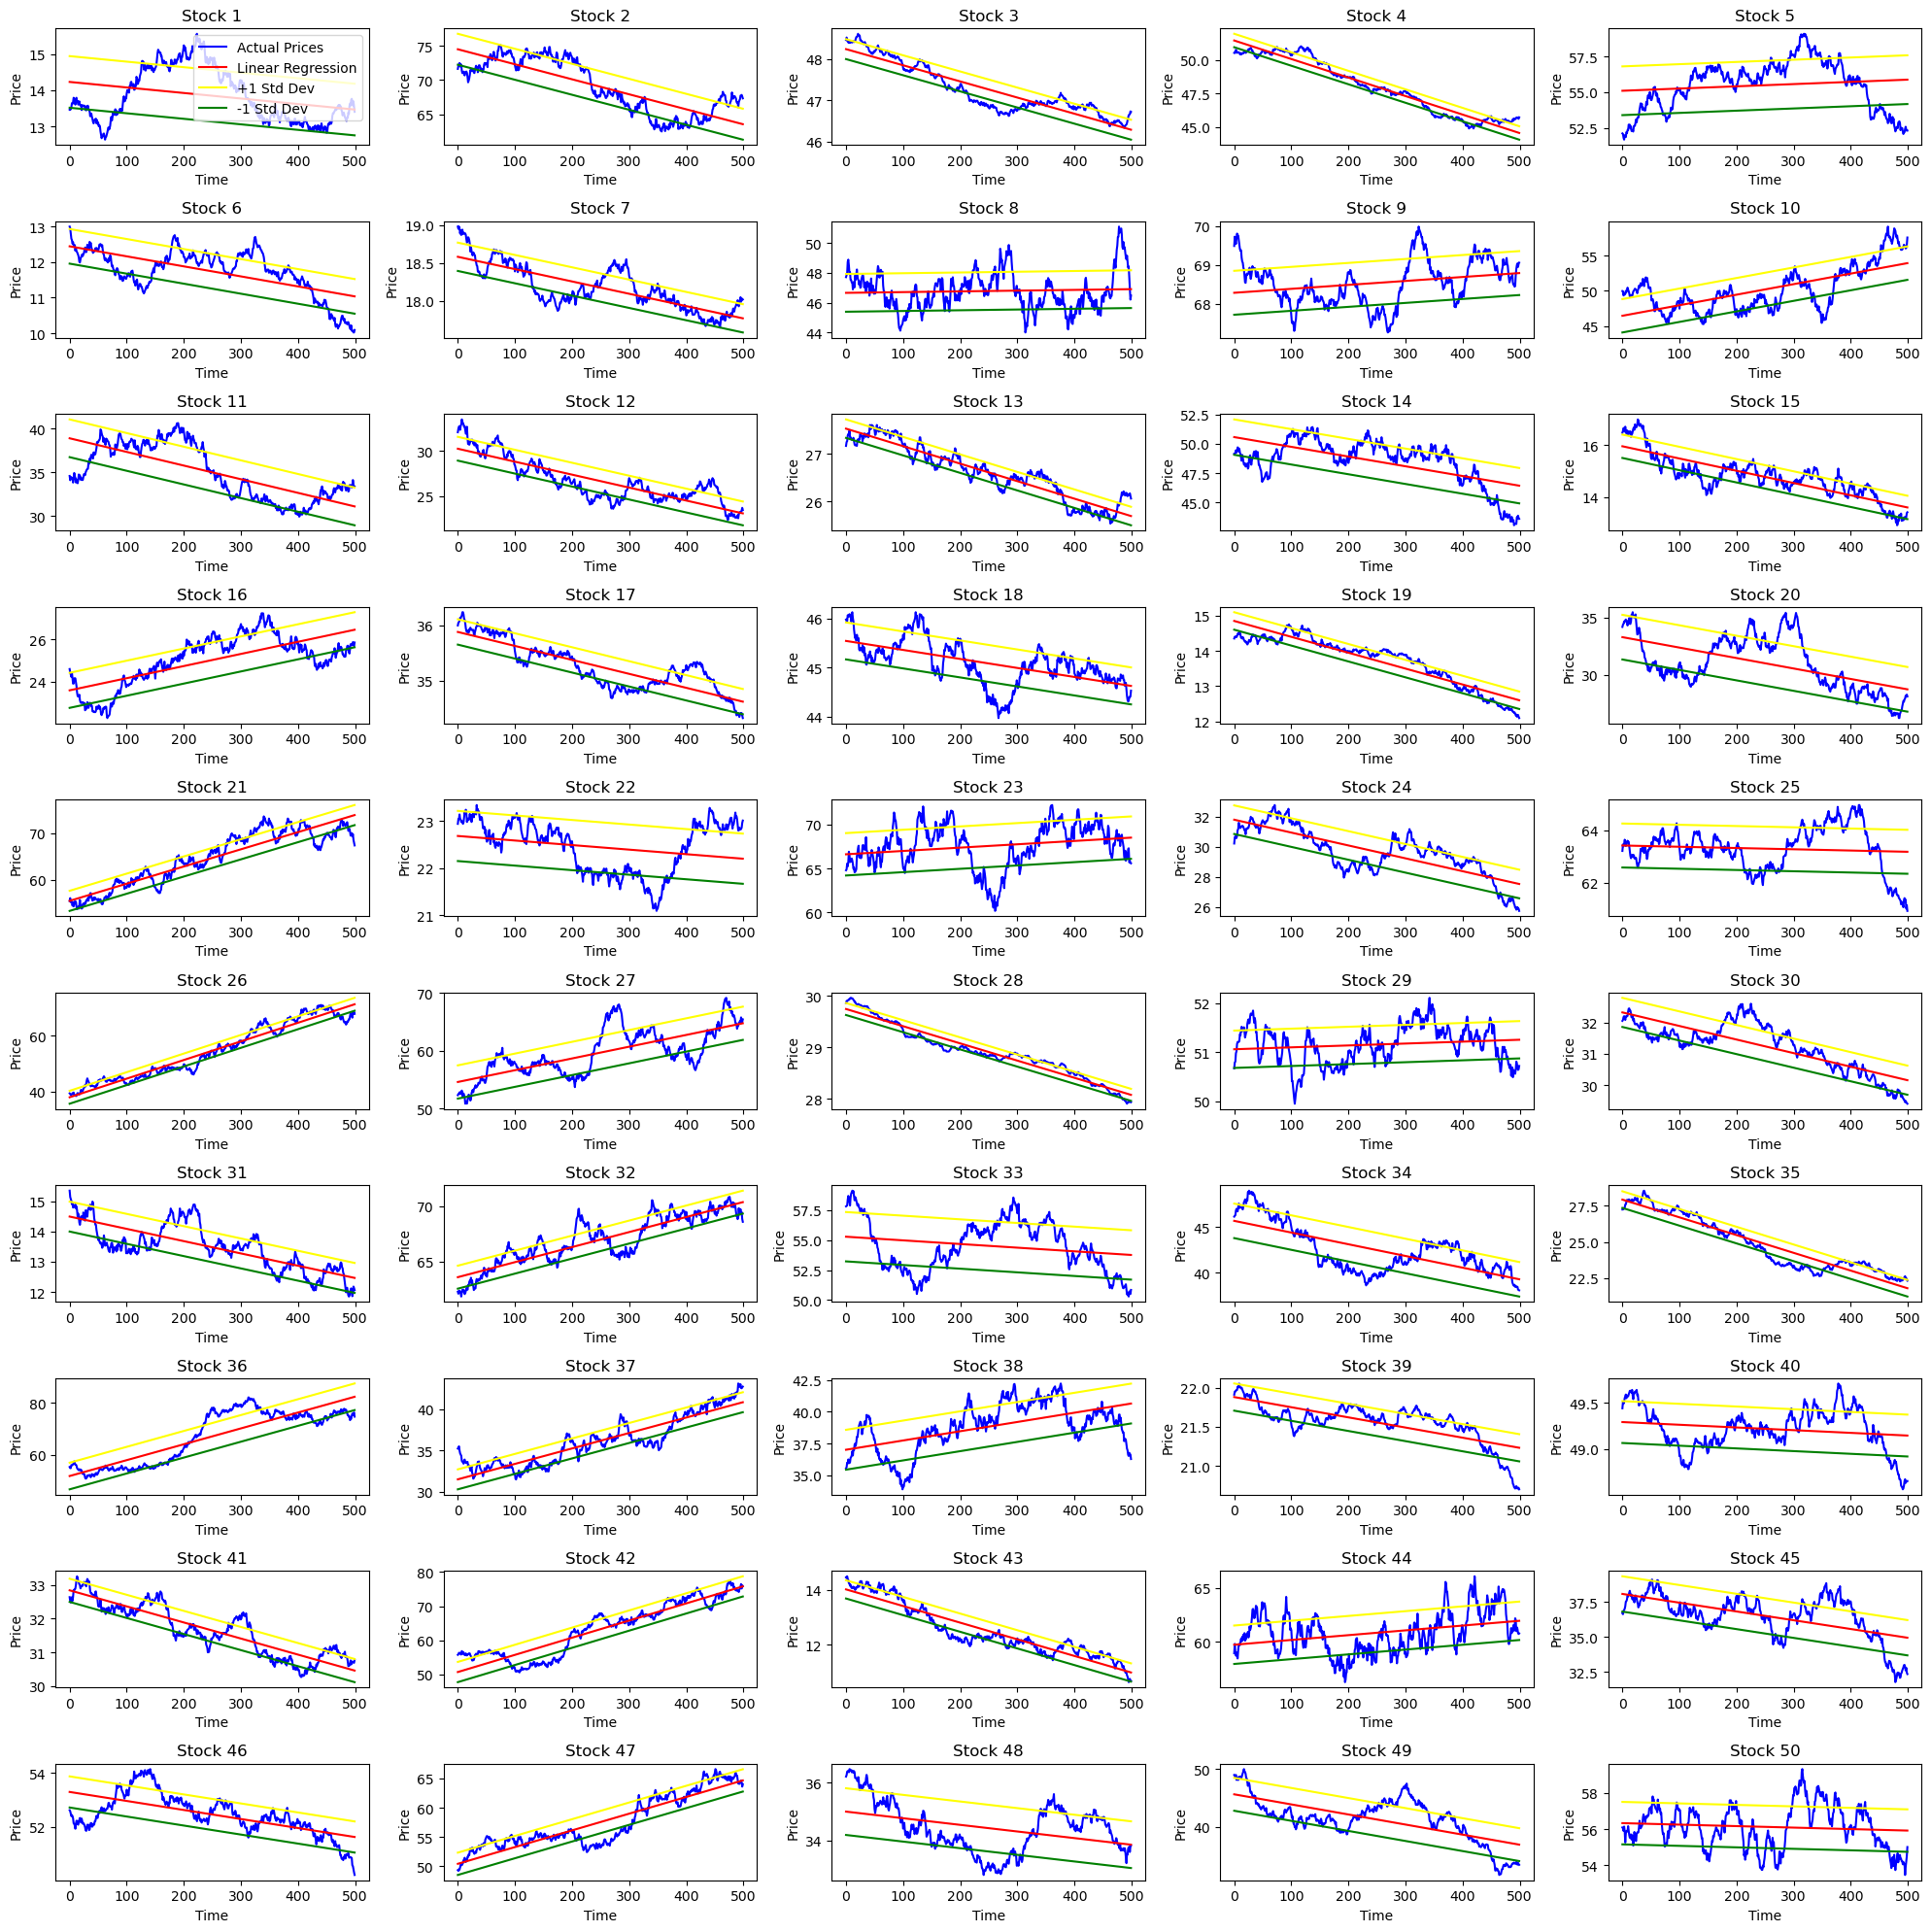

In [5]:
prcSoFar = prcAll

nInst = 50
nCols = 5
nRows = nInst // nCols



fig, axs = plt.subplots(nRows, nCols, figsize=(20, 20))
axs = axs.flatten()

for i in range(nInst):
    prices = prcSoFar[i, :]
    times = np.arange(prices.shape[0]).reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression().fit(times, prices)
    trend = model.predict(times)
    
    # Calculate standard deviation of residuals
    residuals = prices - trend
    std_dev = np.std(residuals)
    
    # Calculate upper and lower bounds
    upper_bound = trend + std_dev
    lower_bound = trend - std_dev
    
    # Plot the actual prices and the linear regression lines
    axs[i].plot(prices, label='Actual Prices', color='blue')
    axs[i].plot(trend, label='Linear Regression', color='red')
    axs[i].plot(upper_bound, label='+1 Std Dev', color='yellow')
    axs[i].plot(lower_bound, label='-1 Std Dev', color='green')
    axs[i].set_title(f'Stock {i+1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Price')
    
    if i == 0:
        axs[i].legend()

plt.tight_layout()
plt.show()
